# T1 정글러 동선 파악 - 데이터 다운로드

커즈 : Cuzzzzzzz

엘림 : 엘 림, T1 Ellim

오너 : U face z, T1 Oner

In [2]:
import requests
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

from pandas.io.json import json_normalize
from datetime import datetime

import os
from dotenv import load_dotenv

load_dotenv(".env")

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
## 한글 폰트
import matplotlib.font_manager as fm
import matplotlib as mpl

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

for font in font_list:
    if 'Nanum' in font:
        print(font)
        
print()
print(mpl.matplotlib_fname())

plt.rcParams["font.family"] = 'NanumGothic'

## 마이너스 부호
mpl.rcParams['axes.unicode_minus'] = False

/Library/Fonts/NanumSquareRoundEB.ttf
/Library/Fonts/NanumSquareExtraBold.ttf
/Library/Fonts/NanumSquareRoundR.ttf
/Library/Fonts/NanumSquareBold.ttf
/Library/Fonts/NanumBarunGothicLight.ttf
/System/Library/AssetsV2/com_apple_MobileAsset_Font6/5c10807185ddbca859bc0b3ecefe55ebb1985aa9.asset/AssetData/NanumMyeongjo.ttc
/Library/Fonts/NanumSquareRoundL.ttf
/Library/Fonts/NanumBarunGothic.ttf
/Library/Fonts/NanumMyeongjoExtraBold.ttf
/Library/Fonts/NanumBarunpenBold.ttf
/System/Library/AssetsV2/com_apple_MobileAsset_Font6/ee9e9584cd1a5f676e03a9efcc80783bc7e12e2c.asset/AssetData/NanumGothic.ttc
/Library/Fonts/NanumGothic.ttf
/Library/Fonts/NanumGothicBold.ttf
/Library/Fonts/NanumSquareRoundB.ttf
/Library/Fonts/NanumMyeongjo.ttf
/Library/Fonts/NanumBrush.ttf
/Library/Fonts/NanumPen.ttf
/Library/Fonts/NanumBarunpenRegular.ttf
/Library/Fonts/NanumBarunGothicUltraLight.ttf
/System/Library/AssetsV2/com_apple_MobileAsset_Font6/3b0bb049516d6dd825e1cd8731587ca7415517ff.asset/AssetData/NanumScript.t

In [21]:
## riot API
kr_url = 'https://kr.api.riotgames.com/'
asia_url = 'https://asia.api.riotgames.com/'
api_key = os.getenv("API_KEY")
api = '?api_key='+api_key

In [24]:
NICKS = {
    
    ##TOP
    'Canna':['T1 Canna', '아릉사태연'],
    'Zeus':['T1 Zeus', '우 제'],
    
    'Khan':['날뜩한 칼', 'elole', 'TOPKING'],
    'Rascal':['Gen G Rascal'],
    'Burdol':['KKilkkil', 'Gen G Burdol'],
    'Rich':['농심 리치'],
    'Summit':['Liiv Summit'],
    'Kiin':['오뚜기3분미트볼'],
    
    
    ##JUG
    'Cuzz':['Cuzzzzzzz', 'Cuzz', 'T1 Cuzz'], 
    'Ellim':['엘 림', 'T1 Ellim', '레은 고레츠카'],
    'Oner' : ['난 워낙 노빠꾸라', '문신처럼 박힌', 'T1 Oner'],
    
    'Canyon':['JUGKING', '언제나잘하고싶다'],
    'Malrang':['Co24', '700125'],
    'Clid':['Gen G Clid'],
    'Peanut':['XiaoHuaSheng7'],
    'Croco':['Liiv Croco','모두다함께차차차'],
    'Dread':['오리지널찰떡쿠키','7인1화'], 
    
    ##MID
    'Faker':['Hide on bush'],
    'Clozer':['설렘이 없다'],
    
    'ShowMaker':['DK ShowMaker', 'MIDKING', 'iudearname'],
    'Bdd':['Gen G Bdd'],
    'Gori':['GGGori'],
    'FATE':['지진 하루의 끝', 'FATE'],
    'Fly':['검은머리사나이'],
    'Chovy':['Chooooovyyyyyy', 'douyu TV 5306305'],
    
    ##ADC
    'Teddy':['La Conviette', 'T1 Teddy'],
    'Gumayusi':['T1 Gumayusi', '구마유시2'],
    
    'Ghost':['DWG Ghost'],
    'Ruler':['Gen G Ruler'],
    'deokdam':['deokdam'],
    'Prince':['원딜 왕자 이채환', '가고싶다 룰드컵'],
    'Bang':['너브내서리풀'],
    'Leo':['AF Le5', '읽씹맨'],
    'Deft':['fjaosifojidsafoa'],
    
    ##SUP
    'Keria':['Kimwinter'],
    'BeryL':['DWG BeryL'],
    'Life':['곽곽보성'],
    'Kellin':['참새크면비둘기', '댕청잇'],
    'Effort':['Liiv Effort'],
    'Lehends':['Lehends']
    
}

LCK_toplaners = ['Canna', 'Zeus', 'Khan', 'Rascal', 'Burdol', 'Rich', 'Summit', 'Kiin']
LCK_junglers = ['Cuzz', 'Ellim', 'Oner', 'Malrang', 'Clid', 'Canyon', 'Peanut', 'Croco', 'Dread']
LCK_midlaners = ['Faker', 'Clozer', 'ShowMaker', 'Bdd', 'Gori', 'FATE', 'Fly', 'Chovy']
LCK_adcarries = ['Teddy', 'Gumayusi', 'Ghost', 'Ruler', 'deokdam', 'Prince', 'Bang', 'Leo', 'Deft']
LCK_supporters = ['Keria', 'BeryL', 'Life', 'Kellin', 'Effort', 'Lehends']

In [19]:
class Summoner:
    
    def __init__(self, summonerName, summonerNicks):
        self.summonerName = summonerName
        self.summonerNicks = summonerNicks
        
        self._load_summonerInfo()
        self._load_matchlist_v4()
        
        
    def _load_summonerInfo(self):
        player_df = pd.DataFrame()
        
        for nick in self.summonerNicks:
            req = requests.get(f'{kr_url}lol/summoner/v4/summoners/by-name/{nick}{api}')
            temp_df = json_normalize(req.json())
            player_df = player_df.append(temp_df, ignore_index=True)

        player_df = player_df[['name', 'summonerLevel', 'id', 'accountId', 'puuid', 'revisionDate']]
        self.summonerInfo = player_df
    
    
    def _load_matchlist(self):
        match_list = []
    
        for puuid in self.summonerInfo['puuid']:
            
            start = 0; max_length = 1000
            
            while start < max_length:
                try:
#                     print('start:',start)
#                     print(f'{asia_url}lol/match/v5/matches/by-puuid/{puuid}/ids{api}&queue=420&type=ranked&start={start}&count=100')
                    matches_req = requests.get(f'{asia_url}lol/match/v5/matches/by-puuid/{puuid}/ids{api}&queue=420&type=ranked&start={start}&count=100')
                    
                    if len(matches_req.json()) == 0: break
                    match_list = match_list + matches_req.json()
                    
                    start += 100; 
                    if start % 100 == 0: print('##', end='')

                #요청 제한 넘긴 경우
                except Exception as e:
                    if matches_req.status_code == 429:
#                         print('waiting...')
                        time.sleep(120)
                    else:
#                         print('_load_matchlist : ', e)
                        pass
                        
        self.match_list = match_list
        print()
        
        
    def _load_matchlist_v4(self):
        match_list = []
    
        for accid in self.summonerInfo['accountId']:
            
            start = 0; max_length = 300
            
            while start < max_length:
                try:
                    matches_req = requests.get(f'{kr_url}lol/match/v4/matchlists/by-account/{accid}/{api}&queue=420&beginIndex={start}')
#                     print(f'{kr_url}lol/match/v4/matchlists/by-account/{accid}/{api}&queue=420&beginIndex={start}')
                    
                    if len(matches_req.json()['matches']) == 0: break
#                     print(json_normalize(matches_req.json()['matches']))
                    temp_match_list = json_normalize(matches_req.json()['matches'])['gameId'].to_list()
                    match_list = match_list + temp_match_list
                    
                    start += 100; 
                    if start % 100 == 0: print('##', end='')

                #요청 제한 넘긴 경우
                except Exception as e:
                    if matches_req.status_code == 429:
#                         print('waiting...')
                        time.sleep(120)
                    else:
#                         print('_load_matchlist_v4 : ', e)
                        pass
                        
        self.match_list = match_list
        print()
            
        
def get_matchInfo(matchId):
    while True:
        try:
            req = requests.get(f'{asia_url}lol/match/v5/matches/KR_{matchId}{api}')
            
            ## metadata 정리
            metadata_df = json_normalize(req.json()['metadata'])
            metadata_df = pd.DataFrame(metadata_df['participants'].values.tolist(), columns=np.arange(1,11)).add_prefix('participant').join(metadata_df) #participants column ==> participant1, participant1, ..., participant10 columns
            metadata_df.drop(columns=['participants'], inplace=True)


            ## info 정리
            info_df = json_normalize(req.json()['info']).drop(columns=['teams','participants'])
            info_df['gameCreation(datetime)'] = info_df['gameCreation'].apply(lambda x: datetime.fromtimestamp(x/1000)) #게임 생성 시간 datetime 형식으로
            info_df['gameDuration(mm:ss)'] = info_df['gameDuration'].apply(lambda x: f'{(x/1000)//60:02.0f}:{(x/1000)%60:02.0f}') #게임 지속 시간 mm:ss 형식으로


            ## participant 정리
            participants_df = json_normalize(req.json()['info']['participants'])

            #Primary lune
            participants_df['perks.primaryStyle'] = participants_df['perks.styles'].apply(lambda x: x[0]['style'])
            for selection in range(1,5):
                participants_df[f'perks.primaryStyle.selection{selection}'] = participants_df['perks.styles'].apply(lambda x: x[0]['selections'][selection-1]['perk'])
                for var in range(1,4):
                    participants_df[f'perks.primaryStyle.selection{selection}.var{var}'] = participants_df['perks.styles'].apply(lambda x: x[0]['selections'][selection-1][f'var{var}'])
            #Sub lune
            participants_df['perks.subStyle'] = participants_df['perks.styles'].apply(lambda x: x[1]['style'])
            for selection in range(1,3):
                participants_df[f'perks.subStyle.selection{selection}'] = participants_df['perks.styles'].apply(lambda x: x[1]['selections'][selection-1]['perk'])
                for var in range(1,4):
                    participants_df[f'perks.subStyle.selection{selection}.var{var}'] = participants_df['perks.styles'].apply(lambda x: x[1]['selections'][selection-1][f'var{var}'])

            participants_df = participants_df.drop(columns=['perks.styles'])
            participants_df = pd.concat([pd.DataFrame(index=[0]), participants_df], ignore_index=True)
            participants_df = participants_df.T.add_prefix('participant').drop(columns=['participant0'])


            ## team 정리
            team_df = json_normalize(req.json()['info']['teams'])
            ban_df = pd.DataFrame(json_normalize(req.json()['info']['teams'])['bans'].values.tolist()).add_prefix('ban')
            for i in range(5):
                ban_df[f'ban{i}'] = ban_df[f'ban{i}'].apply(lambda x: x['championId'])
            team_df = pd.merge(team_df,ban_df,left_index=True,right_index=True)
            team_df.drop(columns=['bans'], inplace=True)
            
            return metadata_df, info_df, participants_df, team_df
            
        except Exception as e:
            if req.status_code == 429:
                time.sleep(120)
                continue
            else:
#                 print('get_matchInfo : ', e)
#                 print('error : ',e)
                return None, None, None, None
    


def get_matchTimeline(matchId):
    while True:
        try:
#             req = requests.get(f'{kr_url}lol/match/v4/timelines/by-match/{matchId}/{api}')
            req = requests.get(f'{asia_url}lol/match/v5/matches/KR_{matchId}/timeline{api}')
            
            ## metadata 정리
            metadata_df = json_normalize(req.json()['metadata'])
            metadata_df = pd.DataFrame(metadata_df['participants'].values.tolist(), columns=np.arange(1,11)).add_prefix('participant').join(metadata_df) #participants column ==> participant1, participant1, ..., participant10 columns
            metadata_df.drop(columns=['participants'], inplace=True)


            ## frame 정리
            frames_df = json_normalize(req.json()['info']['frames']).drop(columns=['events'])


            ## event 정리
            events = flatten(json_normalize(req.json()['info']['frames'])['events'].values.tolist())
            events_df = json_normalize(events)
            events_df['realTimestamp(datetime)'] = events_df['realTimestamp'].apply(lambda x: x if np.isnan(x) else datetime.fromtimestamp(x/1000)) #실제 시간 datetime 형식으로
            events_df['timestamp(mm:ss)'] = events_df['timestamp'].apply(lambda x: f'{(x/1000)//60:02.0f}:{(x/1000)%60:02.0f}') #초 단위로    
            
            return metadata_df, frames_df, events_df
            
        except Exception as e:
            if req.status_code == 429:
                time.sleep(120)
                continue
            else:
#                 print('get_matchTimeline : ', e)
#                 print('error :', e)
                break

        
    
def flatten(t):
    return [item for sublist in t for item in sublist]

In [26]:
for player in LCK_supporters:
    
    print('==========',player,'==========')
    
    Jungler = Summoner(player, NICKS[player])
    puuids = Jungler.summonerInfo['puuid'].values.tolist()

    MatchInfo = pd.DataFrame()
    MatchTimeline = pd.DataFrame()
    MatchEvent = pd.DataFrame()


    for i, matchId in enumerate(Jungler.match_list):

        ## matchInfo
        metadata_df, info_df, participants_df, team_df = get_matchInfo(matchId)
        if metadata_df is None: 
#             print(matchId)
            continue
            
        for puuid in puuids:
            try:
                participant_num = int(metadata_df.T.loc[metadata_df.T[0]==puuid].index[0][11:])
                break
            except IndexError as e:
                continue
        
        pp = participants_df[[f'participant{participant_num}']].T.reset_index(drop=True)
        tt = team_df.loc[team_df['teamId'] == pp['teamId'][0]].reset_index(drop=True)
        temp_df = pd.concat([metadata_df, info_df, pp, tt], axis=1)
        temp_df = temp_df.loc[:,~temp_df.columns.duplicated()] #중복 column 삭제

        MatchInfo = pd.concat([MatchInfo, temp_df], join='outer')
        MatchInfo.to_csv(f'./data/{player}.csv')

        ## matchTimeline
        metadata_df, frames_df, events_df = get_matchTimeline(matchId)

        ff = frames_df.filter(regex=f'\.{participant_num}\.')
        ff = ff.rename(columns=lambda x: x[x.find('.')+1:])
        ff = ff.rename(columns=lambda x: x[x.find('.')+1:])
        ff = ff.join(frames_df['timestamp'])
        ff['matchId'] = matchId
        ff = ff.loc[:,~ff.columns.duplicated()] #중복 column 삭제

        MatchTimeline = pd.concat([MatchTimeline, ff], join='outer')
        MatchTimeline.to_csv(f'./data/{player}_timeline.csv')

        ## matchEvent
        ee = events_df.copy()
        ee['matchId'] = matchId
        ee = ee.loc[:,~ee.columns.duplicated()] #중복 column 삭제

        MatchEvent = pd.concat([MatchEvent, ee], join='outer')
        MatchEvent.to_csv(f'./data/{player}_event.csv')

        if i % 100 == 0:
            print(f'{i:4d}', ':', matchId, '==>', info_df['gameCreation(datetime)'][0])

========== Keria ==========
######
   0 : 5402298466 ==> 2021-08-19 22:55:16
 100 : 5360139700 ==> 2021-07-31 02:16:21
 200 : 5307786178 ==> 2021-07-07 01:47:31
========== BeryL ==========
######
   0 : 5402632383 ==> 2021-08-20 01:33:46
 100 : 5277085587 ==> 2021-06-22 01:44:24
 200 : 5232102282 ==> 2021-05-30 23:56:32
========== Life ==========
######
   0 : 5405445907 ==> 2021-08-21 16:26:19
 100 : 5370627227 ==> 2021-08-05 00:07:02
 200 : 5332092486 ==> 2021-07-18 14:51:05
========== Kellin ==========
############
   0 : 5404535438 ==> 2021-08-21 02:45:42
 100 : 5364455045 ==> 2021-08-01 22:14:17
 200 : 5310364659 ==> 2021-07-08 13:07:36
 300 : 5262894654 ==> 2021-06-15 01:48:37
 400 : 5222987157 ==> 2021-05-27 00:51:50
 500 : 5170909274 ==> 2021-05-03 20:47:36
========== Effort ==========
######
   0 : 5394607600 ==> 2021-08-16 01:51:03
 100 : 5245851247 ==> 2021-06-06 18:07:01
 200 : 5210400152 ==> 2021-05-21 01:26:54
========== Lehends ==========
######
   0 : 5406349405 ==> 202

In [668]:
def get_x_position(x):
    return x/15000*512

def get_y_position(y):
    return 512-((y/15000)*512)

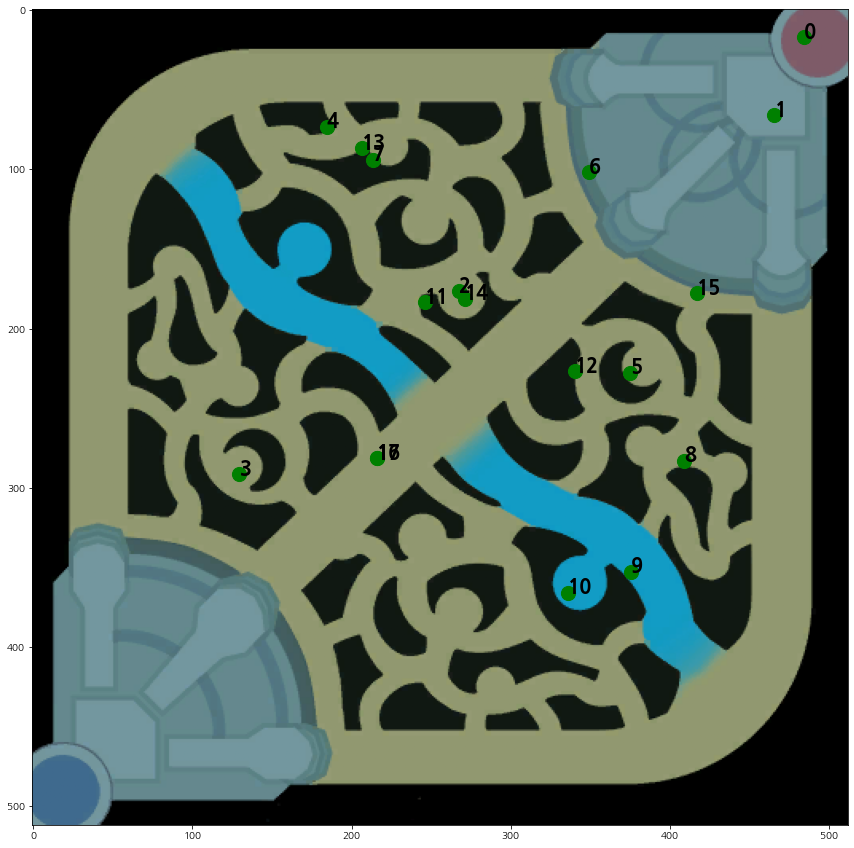

In [682]:
fig, ax = plt.subplots(figsize=(15,15))

rift_map = img.imread('./img/map/map11.png')
ax.imshow(rift_map)

colors = ['red', 'orange', 'green', 'blue', 'purple']

x_positions = frames_df[f'participantFrames.{participant_num}.position.x'].values
y_positions = frames_df[f'participantFrames.{participant_num}.position.y'].values

i = 0
for x, y in zip(x_positions,y_positions):
    ax.scatter(get_x_position(x), get_y_position(y), marker='o', s=200, c=colors[participant_num-5])
    ax.text(get_x_position(x), get_y_position(y), f'{i}', size=20, weight='bold')
    i += 1

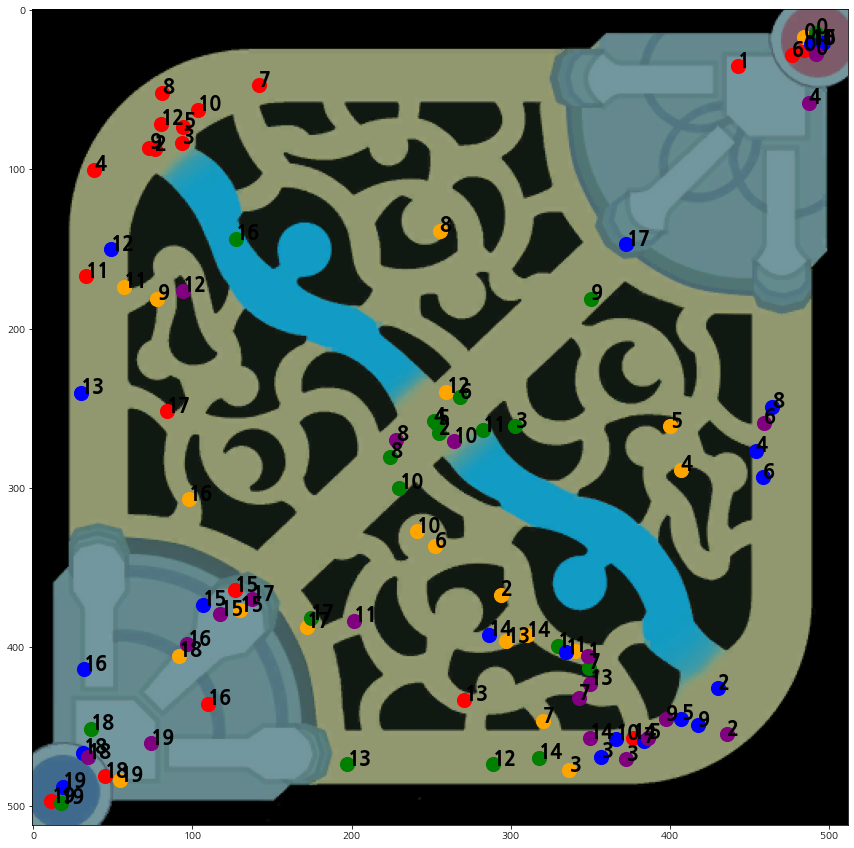

In [496]:
fig, ax = plt.subplots(figsize=(15,15))

rift_map = img.imread('./img/map/map11.png')
ax.imshow(rift_map)

colors = ['red', 'orange', 'green', 'blue', 'purple']
for participant_num in range(5,10):
    x_positions = frames_df[f'participantFrames.{participant_num+1}.position.x'].values
    y_positions = frames_df[f'participantFrames.{participant_num+1}.position.y'].values

    i = 0
    for x, y in zip(x_positions,y_positions):
        ax.scatter(get_x_position(x), get_y_position(y), marker='o', s=200, c=colors[participant_num-5])
        ax.text(get_x_position(x), get_y_position(y), f'{i}', size=20, weight='bold')
        i += 1

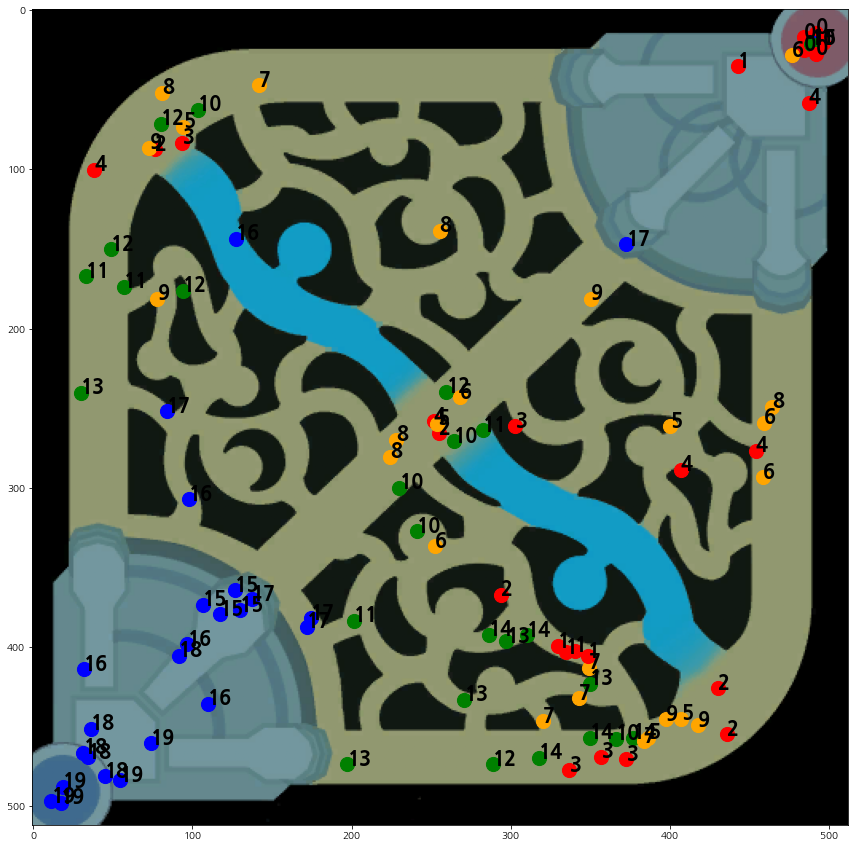

In [497]:
fig, ax = plt.subplots(figsize=(15,15))

rift_map = img.imread('./img/map/map11.png')
ax.imshow(rift_map)

colors = ['red', 'orange', 'green', 'blue', 'purple']
for participant_num in range(5,10):
    x_positions = frames_df[f'participantFrames.{participant_num+1}.position.x'].values
    y_positions = frames_df[f'participantFrames.{participant_num+1}.position.y'].values

    i = 0
    for x, y in zip(x_positions,y_positions):
        ax.scatter(get_x_position(x), get_y_position(y), marker='o', s=200, c=colors[i//5])
        ax.text(get_x_position(x), get_y_position(y), f'{i}', size=20, weight='bold')
        i += 1